# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here.
import pandas as pd

student_data = pd.DataFrame({'StudentID' : [1,2,3,4,5,6,7,8,9,10], 'Age' : [17,51,27,21,36,48,19,26,54,30], 'Tardies' : [10,1,5,9,4,2,9,6,0,3]})
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

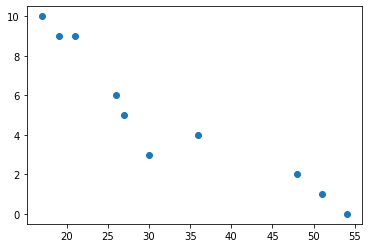

In [2]:
# Your code here.
import matplotlib.pyplot as plt

plt.scatter(student_data['Age'], student_data['Tardies'])
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [3]:
# Your response here. 
'''
Tardiness does indeed seem to go down as age goes up.
'''

'\nTardiness does indeed seem to go down as age goes up.\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# Your response here.
#correlation:
print(student_data.corr())

#covariance:
print(student_data.cov())

           StudentID       Age   Tardies
StudentID   1.000000  0.186190 -0.347113
Age         0.186190  1.000000 -0.939163
Tardies    -0.347113 -0.939163  1.000000
           StudentID         Age    Tardies
StudentID   9.166667    7.722222  -3.722222
Age         7.722222  187.655556 -45.566667
Tardies    -3.722222  -45.566667  12.544444


In [5]:
'''
1. 
Covariance is a measure of the joint variability of two random variables. 
If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds 
for the lesser values, (i.e., the variables tend to show similar behavior), the covariance is positive.
Pearson correlation coefficient measures linear correlation between two variables X and Y. The correlation coefficient 
ranges from −1 to 1. A value of 1 implies that a linear equation describes the relationship between X and Y perfectly, with
all data points lying on a line for which Y increases as X increases.
The main difference is that covariance does not take into account if the relationship between X and Y is linear or not, just
if the values change in the same direction (grow or fall together).

2.
Age and tardiness have a correlation coeficient of -0.93, it indicates that the relationship is fairly linear and 
negative.
The covariance is also negative, indicating a negative relationship. As X (age) goes up Y (tardiness) goes down.
'''

'\n1. \nCovariance is a measure of the joint variability of two random variables. \nIf the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds \nfor the lesser values, (i.e., the variables tend to show similar behavior), the covariance is positive.\nPearson correlation coefficient measures linear correlation between two variables X and Y. The correlation coefficient \nranges from −1 to 1. A value of 1 implies that a linear equation describes the relationship between X and Y perfectly, with\nall data points lying on a line for which Y increases as X increases.\nThe main difference is that covariance does not take into account if the relationship between X and Y is linear or not, just\nif the values change in the same direction (grow or fall together).\n\n2.\nAge and tardiness have a correlation coeficient of -0.93, it indicates that the relationship is fairly linear and \nnegative.\nThe covariance is also negative, indicatin

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# Your response here.
from scipy import stats


# defining the dep. and indep. variables
x = student_data['Age']
y = student_data['Tardies']

# building model
results = stats.linregress(x,y)

'''
The outcome variable is results.
I am using a linear regression from scipy.
'''

'\nThe outcome variable is results.\nI am using a linear regression from scipy.\n'

Plot your regression model on your scatter plot.

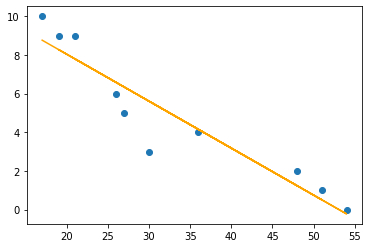

In [7]:
# Your code here.
regression_line = results.intercept + results.slope*x
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

In [8]:
results

LinregressResult(slope=-0.24282077091598084, intercept=12.88880336313577, rvalue=-0.9391626886887123, pvalue=5.56665383455336e-05, stderr=0.03139728816158602)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [9]:
# Your response here. 
r = results[2]
R_squared = r**2
R_squared

0.8820265558250112

In [10]:
'''
1.
Given the R-squared of 0.88 and the low p-value, I am confident to say that linear regression fits well this data. 

2.
The variables have a clear negative linear relationship. As age goes up, tardiness goes down at an approximate rate of 
-0.24h per additional year of age.
'''

'\n1.\nGiven the R-squared of 0.88 and the low p-value, I am confident to say that linear regression fits well this data. \n\n2.\nThe variables have a clear negative linear relationship. As age goes up, tardiness goes down at an approximate rate of \n-0.24h per additional year of age.\n'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [11]:
# Import any libraries you may need & the data
import statsmodels.api as sm

df = pd.read_csv('vehicles.csv')
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [12]:
# Your response here. 
df[['Year','Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile']].corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [13]:
'''
1.
The most important variable to determine CO2 emissions is Fuel Barrels/Year.

2.
The least helpfull variable is year.
'''

'\n1.\nThe most important variable to determine CO2 emissions is Fuel Barrels/Year.\n\n2.\nThe least helpfull variable is year.\n'

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [14]:
# Your response here. 
x = df[['Year','Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = df['CO2 Emission Grams/Mile']

model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.092e+06
Date:                     Sun, 08 Nov 2020   Prob (F-statistic):                        0.00
Time:                             13:29:19   Log-Likelihood:                     -1.5250e+05
No. Observations:                    35952   AIC:                                  3.050e+05
Df Residuals:                        35947   BIC:                                  3.050e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0630      0.001     74.153      0.000       0.061       0.065
Cylinders             0.8873      0.081     10.952      0.000       0.729       1.046
Fuel Barrels/Year    19.8588      0.059    337.001      0.000      19.743      19.974
Combined MPG         -3.0509      0.043    -70.368      0.000      -3.136      -2.966
Fuel Cost/Year        0.0292      0.000     60.084      0.000       0.028       0.030
==============================================================================
Omnibus:                    72934.517   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        287219470.909
Skew:                          16.861   Prob(JB):                         0.00
Kurtosis:                     439.575   Cond. No.                     2.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [15]:
# Your response here. 
'''
1.
The most important variable is Fule Barrels/Year, as expected following the correlation analysis we made previously, 
followed by the variable Combined MPG. These two variables have the highest (in terms of absolute value) coeficients, and
as a result, the highest impact in the output of the model.

2. 
Since the R-squared is close to one I have high confidence that as consumption of combustible increases, so do the CO2 
emissions.     
'''

'\n1.\nThe most important variable is Fule Barrels/Year, as expected following the correlation analysis we made previously, \nfollowed by the variable Combined MPG. These two variables have the highest (in terms of absolute value) coeficients, and\nas a result, the highest impact in the output of the model.\n\n2. \nSince the R-squared is close to one I have high confidence that as consumption of combustible increases, so do the CO2 \nemissions.     \n'

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [21]:
# Your code here.
party_df = pd.DataFrame({'X' : [1,3,4,6,8,9,11,14], 'Y' : [1,2,4,4,5,7,8,13]})
party_df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

8
8


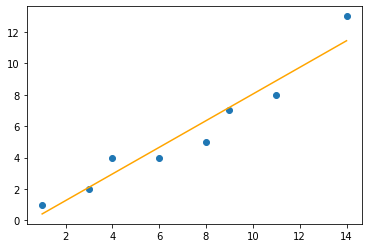

In [24]:
# Your code here.
x = party_df['X']
y = party_df['Y']
results = stats.linregress(x,y)
regression_line = results.intercept + results.slope * x
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [27]:
# Your response here. 
print(results)

'''
It seems that as the number of people invited goes up, so does the number of people who attend
''' 

LinregressResult(slope=0.8484848484848485, intercept=-0.43939393939393945, rvalue=0.9652303546573691, pvalue=0.00010236374464090686, stderr=0.09380896778286217)


'\nIt seems that as the number of people invited goes up, so does the number of people who attend\n'

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [28]:
# Your response here. 
# I guess the outlier would be (14,13), I'll remove that entry
party_df.drop([7],inplace = True)
party_df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


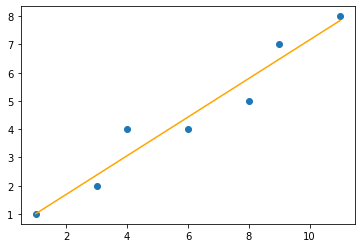

LinregressResult(slope=0.6842105263157895, intercept=0.32330827067669166, rvalue=0.971278116825086, pvalue=0.0002644056885656864, stderr=0.07496206665031294)


In [29]:
x = party_df['X']
y = party_df['Y']
results = stats.linregress(x,y)
regression_line = results.intercept + results.slope * x
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()
print(results)


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
'''
The r value increased when I removed the outlier, the error is smaller. This fact is also observable on the second plot,
the dots are closer to the regresson line.
'''